#### Project Setup

In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [49]:
# read in data
df = pd.read_csv('heart.csv')

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Looking at the Dataset

In [50]:
print("Dimensions of the dataset : ", df.shape)
print("Features of the dataset :")
print(df.describe(include = 'all'))

Dimensions of the dataset :  (918, 12)
Features of the dataset :
               Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS   
count   918.000000  918           918  918.000000   918.000000  918.000000  \
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

#### Preprocessing

Heatmap

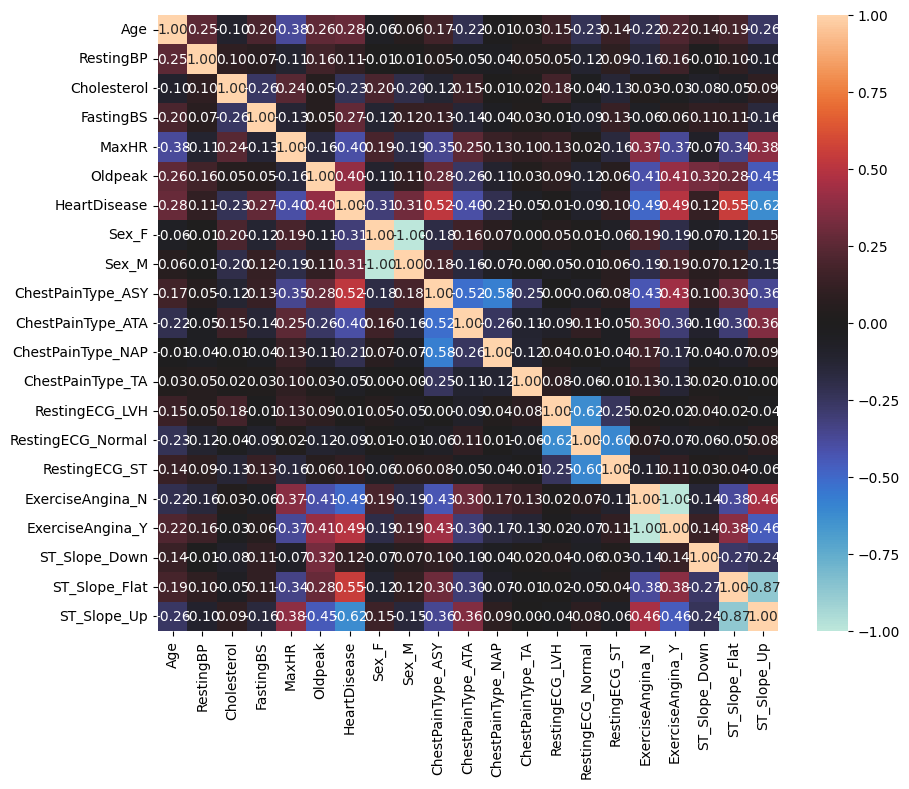

In [51]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)
plt.show()


Pair Plot

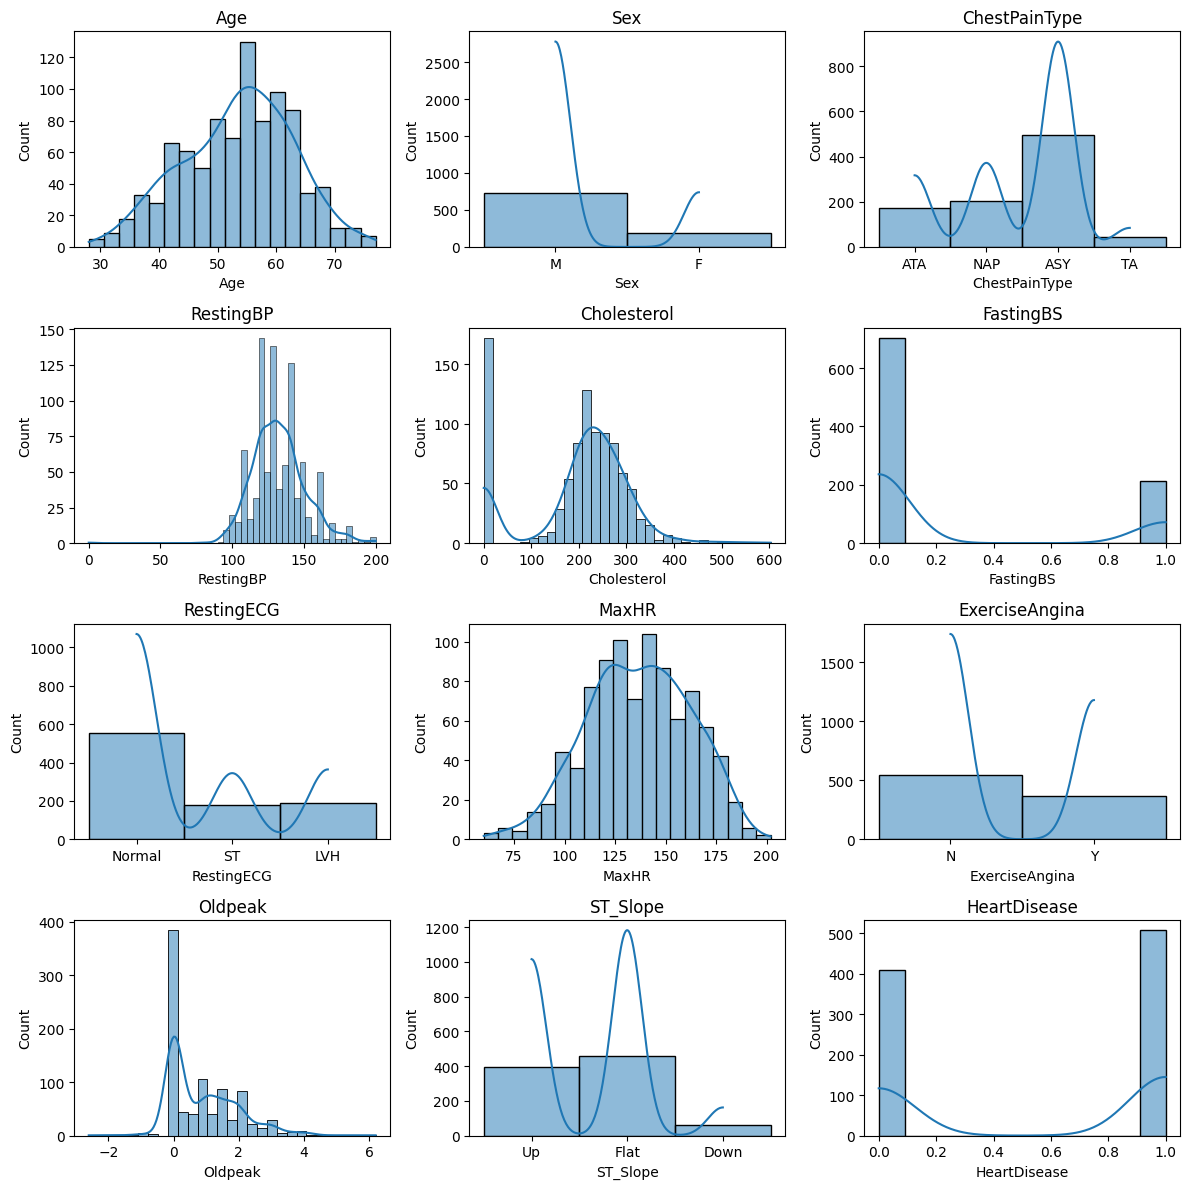

In [52]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()

for i, (col, data) in enumerate(df.items()):
    sns.histplot(data, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()


## Testing out different models

#### Preprocessing

In [53]:
# encode the categorical variables
heart_df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# separate the features and the target variable
X = heart_df_encoded.drop('HeartDisease', axis=1)
y = heart_df_encoded['HeartDisease']

#### 1. Train and Test Logistic Regression model

In [54]:
# adjustable parameters
test_train_splits = [0.2, 0.3, 0.4]
penalty_types = ['l1', 'l2', 'none']

for split in test_train_splits:
    for penalty in penalty_types:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

        log_reg_model = LogisticRegression(max_iter=10000, penalty=penalty, solver='saga' if penalty != 'none' else 'lbfgs')
        
        try:
            log_reg_model.fit(X_train, y_train)
        except ValueError as e:
            print(f"Skipping penalty type {penalty} due to error: {e}")
            continue

        y_pred = log_reg_model.predict(X_test)

        conf_matrix = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Test-Train Split: {split}, Penalty: {penalty}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("-" * 50)


Test-Train Split: 0.2, Penalty: l1
Confusion Matrix:
[[67 10]
 [20 87]]
Accuracy: 0.8369565217391305
Precision: 0.8969072164948454
Recall: 0.8130841121495327
F1 Score: 0.8529411764705883
--------------------------------------------------
Test-Train Split: 0.2, Penalty: l2
Confusion Matrix:
[[67 10]
 [20 87]]
Accuracy: 0.8369565217391305
Precision: 0.8969072164948454
Recall: 0.8130841121495327
F1 Score: 0.8529411764705883
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Test-Train Split: 0.2, Penalty: none
Confusion Matrix:
[[67 10]
 [17 90]]
Accuracy: 0.8532608695652174
Precision: 0.9
Recall: 0.8411214953271028
F1 Score: 0.8695652173913043
--------------------------------------------------
Test-Train Split: 0.3, Penalty: l1
Confusion Matrix:
[[100  12]
 [ 24 140]]
Accuracy: 0.8695652173913043
Precision: 0.9210526315789473
Recall: 0.8536585365853658
F1 Score: 0.8860759493670887
--------------------------------------------------
Test-Train Split: 0.3, Penalty: l2
Confusion Matrix:
[[100  12]
 [ 23 141]]
Accuracy: 0.8731884057971014
Precision: 0.9215686274509803
Recall: 0.8597560975609756
F1 Score: 0.8895899053627759
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Test-Train Split: 0.3, Penalty: none
Confusion Matrix:
[[ 99  13]
 [ 20 144]]
Accuracy: 0.8804347826086957
Precision: 0.9171974522292994
Recall: 0.8780487804878049
F1 Score: 0.897196261682243
--------------------------------------------------
Test-Train Split: 0.4, Penalty: l1
Confusion Matrix:
[[130  17]
 [ 36 185]]
Accuracy: 0.8559782608695652
Precision: 0.9158415841584159
Recall: 0.8371040723981901
F1 Score: 0.8747044917257683
--------------------------------------------------
Test-Train Split: 0.4, Penalty: l2
Confusion Matrix:
[[130  17]
 [ 37 184]]
Accuracy: 0.8532608695652174
Precision: 0.9154228855721394
Recall: 0.832579185520362
F1 Score: 0.8720379146919433
--------------------------------------------------
Test-Train Split: 0.4, Penalty: none
Confusion Matrix:
[[132  15]
 [ 36 185]]
Accuracy: 0.8614130434782609
Precision: 0.925
Recall: 0.8371040723981901
F1 Score: 0.8788598574821853
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


#### 2. Train and Test SVM model

In [55]:
# adjustable parameters
test_train_splits = [0.2, 0.3, 0.4] 
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

for split in test_train_splits:
    for kernel in kernel_types:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train, y_train)

        y_pred = svm_model.predict(X_test)

        conf_matrix = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        print(f"Test-Train Split: {split}, Kernel: {kernel}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("-" * 50)


Test-Train Split: 0.2, Kernel: linear
Confusion Matrix:
[[67 10]
 [17 90]]
Accuracy: 0.8532608695652174
Precision: 0.9
Recall: 0.8411214953271028
F1 Score: 0.8695652173913043
--------------------------------------------------
Test-Train Split: 0.2, Kernel: poly
Confusion Matrix:
[[48 29]
 [32 75]]
Accuracy: 0.6684782608695652
Precision: 0.7211538461538461
Recall: 0.7009345794392523
F1 Score: 0.7109004739336492
--------------------------------------------------
Test-Train Split: 0.2, Kernel: rbf
Confusion Matrix:
[[54 23]
 [34 73]]
Accuracy: 0.6902173913043478
Precision: 0.7604166666666666
Recall: 0.6822429906542056
F1 Score: 0.7192118226600985
--------------------------------------------------
Test-Train Split: 0.2, Kernel: sigmoid
Confusion Matrix:
[[30 47]
 [50 57]]
Accuracy: 0.47282608695652173
Precision: 0.5480769230769231
Recall: 0.5327102803738317
F1 Score: 0.5402843601895735
--------------------------------------------------
Test-Train Split: 0.3, Kernel: linear
Confusion Matrix

#### 3. Train and Test Naive Bayes model

In [56]:
# adjustable parameters
test_train_splits = [0.2, 0.3, 0.4] 

for split in test_train_splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)

    y_pred = gnb_model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Test-Train Split: {split}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("-" * 50)


Test-Train Split: 0.2
Confusion Matrix:
[[70  7]
 [18 89]]
Accuracy: 0.8641304347826086
Precision: 0.9270833333333334
Recall: 0.8317757009345794
F1 Score: 0.8768472906403941
--------------------------------------------------
Test-Train Split: 0.3
Confusion Matrix:
[[101  11]
 [ 21 143]]
Accuracy: 0.8840579710144928
Precision: 0.9285714285714286
Recall: 0.8719512195121951
F1 Score: 0.8993710691823901
--------------------------------------------------
Test-Train Split: 0.4
Confusion Matrix:
[[132  15]
 [ 35 186]]
Accuracy: 0.8641304347826086
Precision: 0.9253731343283582
Recall: 0.8416289592760181
F1 Score: 0.881516587677725
--------------------------------------------------


#### 4. Train and Test Decision Tree model

In [57]:
# adjustable parameters
test_train_splits = [0.2, 0.3, 0.4]
criteria = ['gini', 'entropy']
max_depths = [None, 5, 10]

for split in test_train_splits:
    for criterion in criteria:
        for max_depth in max_depths:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

            dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
            dt_model.fit(X_train, y_train)

            y_pred = dt_model.predict(X_test)

            conf_matrix = confusion_matrix(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            print(f"Test-Train Split: {split}, Criterion: {criterion}, Max Depth: {max_depth}")
            print(f"Confusion Matrix:\n{conf_matrix}")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1 Score: {f1}")
            print("-" * 50)


Test-Train Split: 0.2, Criterion: gini, Max Depth: None
Confusion Matrix:
[[64 13]
 [24 83]]
Accuracy: 0.7989130434782609
Precision: 0.8645833333333334
Recall: 0.7757009345794392
F1 Score: 0.8177339901477833
--------------------------------------------------
Test-Train Split: 0.2, Criterion: gini, Max Depth: 5
Confusion Matrix:
[[67 10]
 [14 93]]
Accuracy: 0.8695652173913043
Precision: 0.9029126213592233
Recall: 0.8691588785046729
F1 Score: 0.8857142857142858
--------------------------------------------------
Test-Train Split: 0.2, Criterion: gini, Max Depth: 10
Confusion Matrix:
[[65 12]
 [24 83]]
Accuracy: 0.8043478260869565
Precision: 0.8736842105263158
Recall: 0.7757009345794392
F1 Score: 0.8217821782178217
--------------------------------------------------
Test-Train Split: 0.2, Criterion: entropy, Max Depth: None
Confusion Matrix:
[[69  8]
 [30 77]]
Accuracy: 0.7934782608695652
Precision: 0.9058823529411765
Recall: 0.719626168224299
F1 Score: 0.8020833333333333
------------------

#### 5. Train and Test MLP model

In [58]:
# adjustable parameters
test_train_splits = [0.2, 0.3, 0.4]
hidden_layer_sizes = [(100,), (50, 50), (30, 30, 30)]
activations = ['logistic', 'relu', 'tanh']

for split in test_train_splits:
    for hidden_layers in hidden_layer_sizes:
        for activation in activations:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, max_iter=100000, random_state=42)
            mlp_model.fit(X_train_scaled, y_train)

            y_pred = mlp_model.predict(X_test_scaled)

            conf_matrix = confusion_matrix(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            print(f"Test-Train Split: {split}, Hidden Layers: {hidden_layers}, Activation: {activation}")
            print(f"Confusion Matrix:\n{conf_matrix}")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1 Score: {f1}")
            print("-" * 50)


Test-Train Split: 0.2, Hidden Layers: (100,), Activation: logistic
Confusion Matrix:
[[67 10]
 [17 90]]
Accuracy: 0.8532608695652174
Precision: 0.9
Recall: 0.8411214953271028
F1 Score: 0.8695652173913043
--------------------------------------------------
Test-Train Split: 0.2, Hidden Layers: (100,), Activation: relu
Confusion Matrix:
[[68  9]
 [17 90]]
Accuracy: 0.8586956521739131
Precision: 0.9090909090909091
Recall: 0.8411214953271028
F1 Score: 0.8737864077669902
--------------------------------------------------
Test-Train Split: 0.2, Hidden Layers: (100,), Activation: tanh
Confusion Matrix:
[[67 10]
 [20 87]]
Accuracy: 0.8369565217391305
Precision: 0.8969072164948454
Recall: 0.8130841121495327
F1 Score: 0.8529411764705883
--------------------------------------------------
Test-Train Split: 0.2, Hidden Layers: (50, 50), Activation: logistic
Confusion Matrix:
[[67 10]
 [15 92]]
Accuracy: 0.8641304347826086
Precision: 0.9019607843137255
Recall: 0.8598130841121495
F1 Score: 0.880382775